In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [2]:
file_path = 'Gender Type and Education Level.csv'

initial_df = pd.read_csv(file_path)
initial_df.head(20)

,Province/Territory,Description,Total,Male,Female
0,Newfoundland and Labrador,Total population,510550,250075,260475
1,Newfoundland and Labrador,"Total - Highest certificate, diploma or degree",433960,211180,222775
2,Newfoundland and Labrador,Master's degree,17150,6990,10165
3,Newfoundland and Labrador,Earned doctorate,2610,1635,975
4,Prince Edward Island,Total population,154330,75385,78945
5,Prince Edward Island,"Total - Highest certificate, diploma or degree",126895,61450,65445
6,Prince Edward Island,Master's degree,5930,2465,3465
7,Prince Edward Island,Earned doctorate,800,495,305
8,Nova Scotia,Total population,969380,471730,497650
9,Nova Scotia,"Total - Highest certificate, diploma or degree",819315,395805,423510


In [3]:
print(initial_df.iloc[:, 0].unique())

['Newfoundland and Labrador' 'Prince Edward Island' 'Nova Scotia'
 'New Brunswick' 'Quebec' 'Ontario' 'Manitoba' 'Saskatchewan' 'Alberta'
 'British Columbia' 'Yukon' 'Northwest Territories' 'Nunavut']


In [4]:
#create 4 dataframes for QC, ON, BC and AB
qc_data = initial_df[initial_df['Province/Territory'] == 'Quebec'][["Description", "Total", "Male", "Female"]]
on_data = initial_df[initial_df['Province/Territory'] == 'Ontario'][["Description", "Total", "Male", "Female"]]
ab_data = initial_df[initial_df['Province/Territory'] == 'Alberta'][["Description", "Total", "Male", "Female"]]
bc_data = initial_df[initial_df['Province/Territory'] == 'British Columbia'][["Description", "Total", "Male", "Female"]]


In [5]:
#set the description as index
qc_data.set_index("Description", inplace=True)
on_data.set_index("Description", inplace=True)
ab_data.set_index("Description", inplace=True)
bc_data.set_index("Description", inplace=True)
on_data

,Total,Male,Female
Description,,,
Total population,14223945,6970855,7253085
"Total - Highest certificate, diploma or degree",11782820,5733360,6049460
Master's degree,786440,377795,408640
Earned doctorate,119125,71465,47655


In [7]:
on_data

,Total,Male,Female
Description,,,
Total population,14223945,6970855,7253085
"Total - Highest certificate, diploma or degree",11782820,5733360,6049460
Master's degree,786440,377795,408640
Earned doctorate,119125,71465,47655


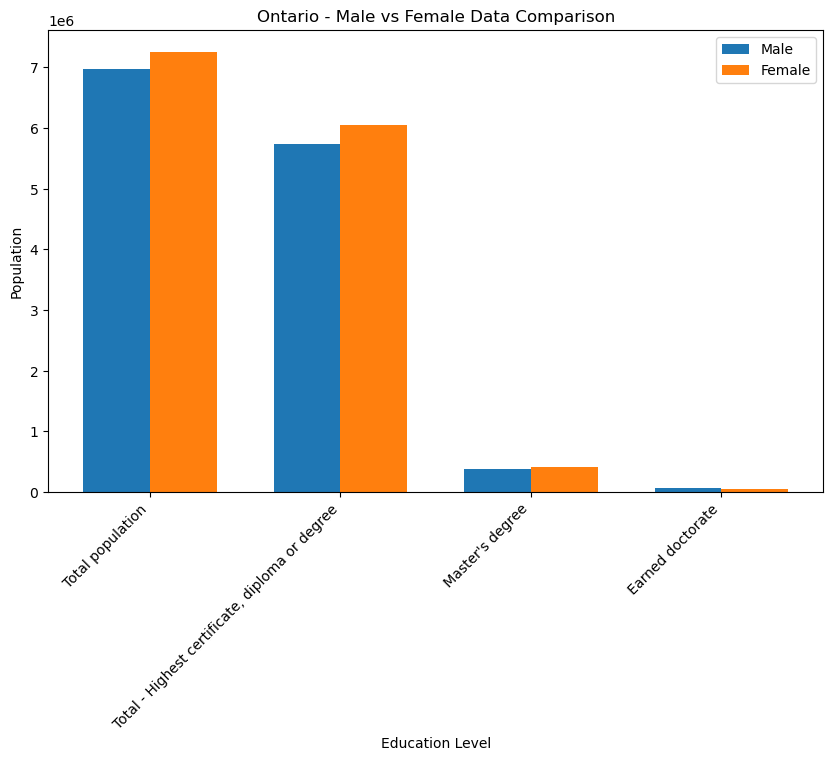

In [14]:
# Ontario
bar_width = 0.35
index = np.arange(len(on_data.index))

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index - bar_width/2, on_data['Male'], bar_width, label='Male')
bar2 = ax.bar(index + bar_width/2, on_data['Female'], bar_width, label='Female')

ax.set_title('Ontario - Male vs Female Data Comparison')
ax.set_xlabel('Education Level')
ax.set_ylabel('Population')
ax.set_xticks(index)
ax.set_xticklabels(on_data.index, rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
ax.legend()

plt.show()

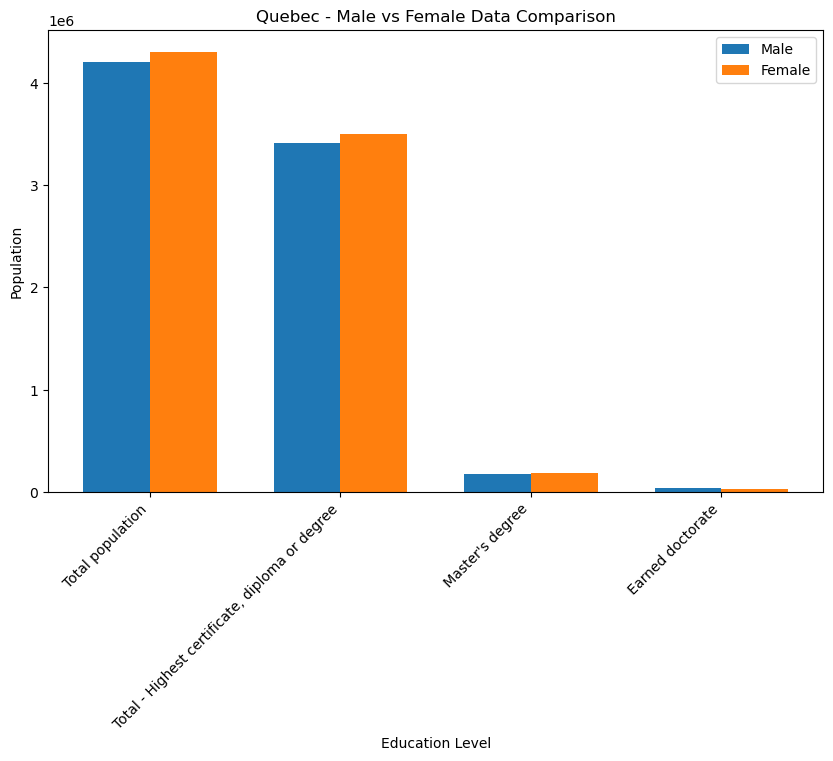

In [16]:
# Quebec
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index - bar_width/2, qc_data['Male'], bar_width, label='Male')
bar2 = ax.bar(index + bar_width/2, qc_data['Female'], bar_width, label='Female')

ax.set_title('Quebec - Male vs Female Data Comparison')
ax.set_xlabel('Education Level')
ax.set_ylabel('Population')
ax.set_xticks(index)
ax.set_xticklabels(qc_data.index, rotation=45, ha='right')
ax.legend()

plt.show()

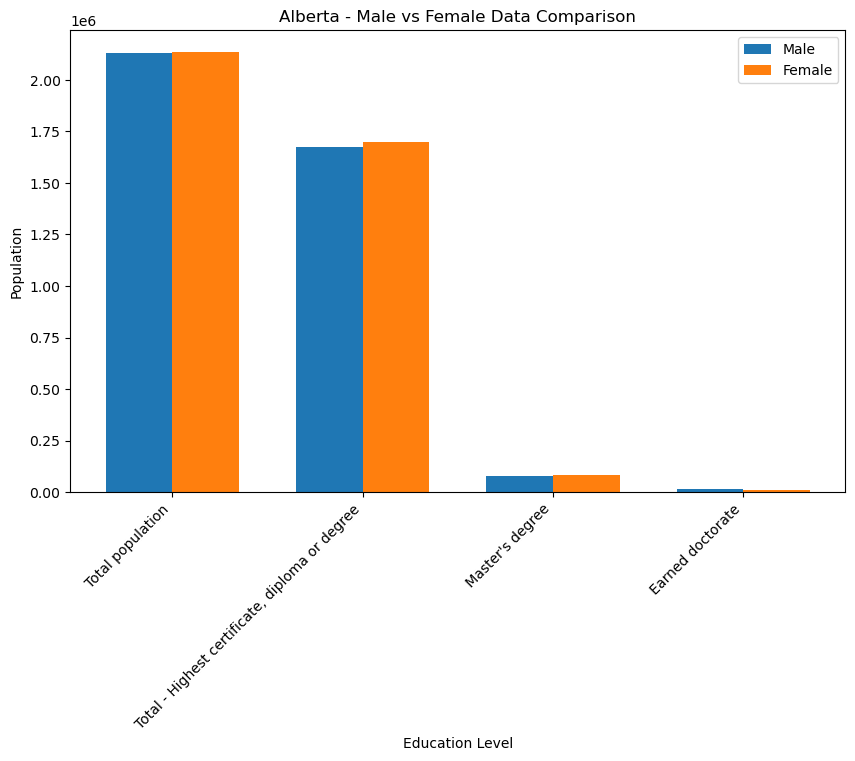

In [17]:
# Alberta
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index - bar_width/2, ab_data['Male'], bar_width, label='Male')
bar2 = ax.bar(index + bar_width/2, ab_data['Female'], bar_width, label='Female')

ax.set_title('Alberta - Male vs Female Data Comparison')
ax.set_xlabel('Education Level')
ax.set_ylabel('Population')
ax.set_xticks(index)
ax.set_xticklabels(ab_data.index, rotation=45, ha='right')
ax.legend()

plt.show()

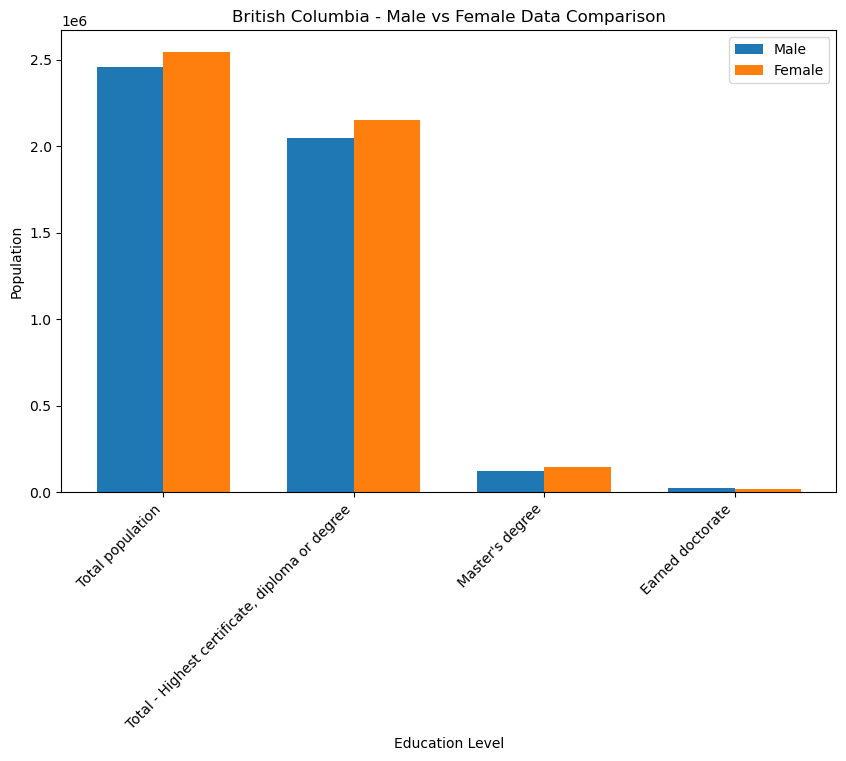

In [18]:
# British Columbia
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index - bar_width/2, bc_data['Male'], bar_width, label='Male')
bar2 = ax.bar(index + bar_width/2, bc_data['Female'], bar_width, label='Female')

ax.set_title('British Columbia - Male vs Female Data Comparison')
ax.set_xlabel('Education Level')
ax.set_ylabel('Population')
ax.set_xticks(index)
ax.set_xticklabels(bc_data.index, rotation=45, ha='right')
ax.legend()

plt.show()

ValueError: 'label' must be of length 'x'

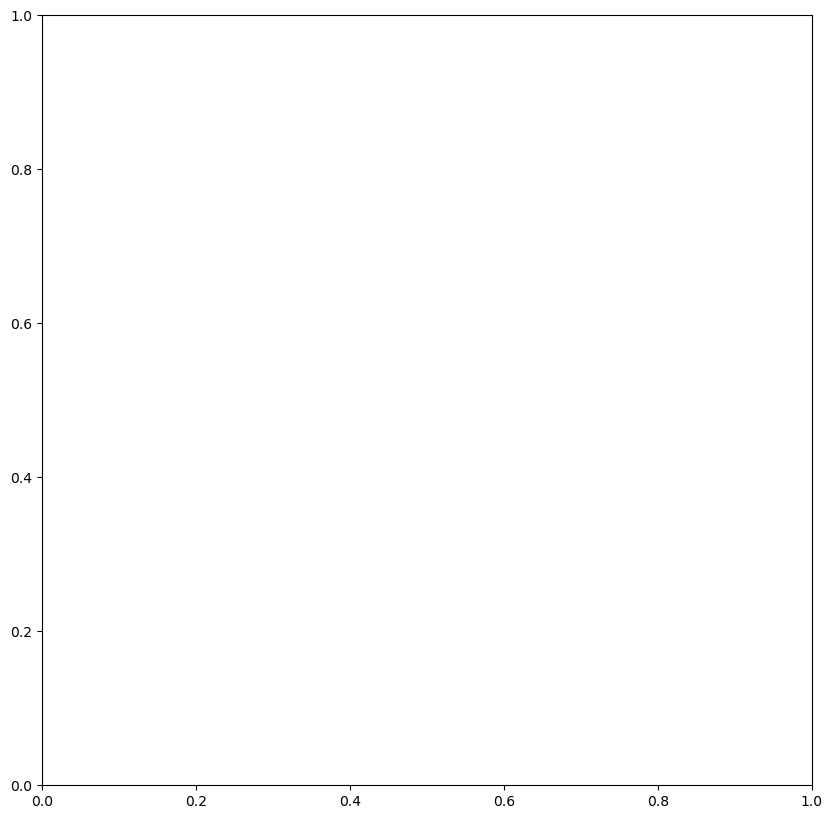

In [21]:
# Choose the desired row for male and female comparison
row_label = 'Total - Highest certificate, diploma or degree'

# Combine all DataFrames
combined_data = pd.concat([qc_data, on_data, ab_data, bc_data], keys=['Quebec', 'Ontario', 'Alberta', 'British Columbia'])

# Select the desired row for male and female comparison
comparison_data = combined_data.loc[(slice(None), row_label), ['Male', 'Female']]

# Plot a pie chart for the male and female populations based on the chosen row across provinces
plt.figure(figsize=(10, 10))
plt.pie(comparison_data.iloc[:, 0], labels=['Male'], autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Male Population Based on {row_label} Across Provinces')
plt.show()

plt.figure(figsize=(10, 10))
plt.pie(comparison_data.iloc[:, 1], labels=['Female'], autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Female Population Based on {row_label} Across Provinces')
plt.show()